In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats.distributions import chi2, norm

np.random.seed(0)
%matplotlib inline

Имеем: $X_1, ..., X_n \sim \mathcal{N}(a,\,\sigma^2)$, причем $a$ известно.

$$ T_1 = \frac{\sum_{k=1}^n (X_n - a)^2}{\sigma^2} \sim \chi^2_n \Rightarrow 
\gamma = P \left(\chi^2_{\frac{1-\gamma}{2},n} \leq T \leq \chi^2_{\frac{1+\gamma}{2},n} \right) = 
P \left( \frac{\sum_{k=1}^n (X_n - a)^2}{\chi^2_{\frac{1+\gamma}{2},n}} \leq \sigma^2 \leq 
\frac{\sum_{k=1}^n (X_n - a)^2}{\chi^2_{\frac{1-\gamma}{2},n}} \right) , $$

где $ \chi^2_{\alpha,n} - \alpha-$квантиль распределения $\chi^2_n$.

$$ T_2 = \sqrt{n} \frac{\bar{X} - a}{\sigma} \sim \mathcal{N}(0,\,1) \Rightarrow 1 - \Phi(z_\gamma) = 
P \left( \sqrt{n} \frac{\left| \bar{X} - a \right| }{\sigma} \geq z_\gamma \right) = 
P \left( \left( \frac{\sigma}{\bar{X} - a} \right)^2 \leq \frac{n}{z^2_\gamma} \right) = 
P \left( 0 \leq \sigma^2 \leq n \left( \frac{\bar{X} - a}{z_\gamma} \right)^2 \right) = \gamma, $$
таким образом, $z_\gamma = \Phi^{-1}(1-\gamma) $, где $\Phi -$ нормальная функция распределения.

Оценим длины интервалы при больших $n$:
$$ L_1 = \frac{1}{\chi^2_{\frac{1-\gamma}{2},n}} - \frac{1}{\chi^2_{\frac{1+\gamma}{2},n}}; 
L_2 = n \left( \frac{\bar{X} - a}{\Phi^{-1}(1-\gamma)} \right)^2 $$

In [2]:
n_range = np.arange(1,30,5)

In [3]:
γ_range = np.array([0.01, 0.5, 0.99])

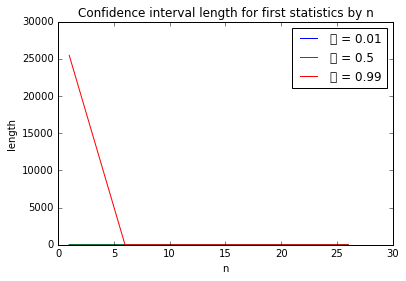

In [36]:
length = np.zeros((len(γ_range), len(n_range)), dtype=np.float64)

fig, ax = plt.subplots()

for i, γ in enumerate(γ_range):
    for j, n in enumerate(n_range):
        length[i,j] = 1/chi2.ppf((1-γ)/2,n) - 1/chi2.ppf((1+γ)/2,n)
    ax.plot(n_range, length[i], label="γ = {}".format(γ))
    
ax.legend(loc=1)
ax.set_xlabel('n')
ax.set_ylabel('length')
ax.set_title('Confidence interval length for first statistics by n')

plt.show()

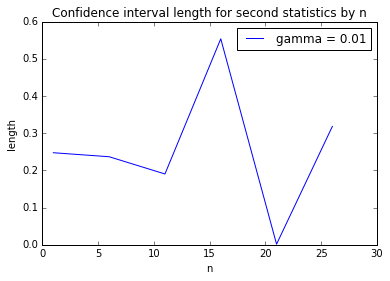

In [16]:
γ_range = np.array([0.01])

length = np.zeros((len(γ_range), len(n_range)), dtype=np.float64)

fig, ax = plt.subplots()

for j, n in enumerate(n_range):
    
    X = np.random.normal(0, 1, n)
    
    for i, γ in enumerate(γ_range):
        length[i,j] = n * (X.mean() / norm.ppf(1-γ))**2
    
for i, γ in enumerate(γ_range):
    ax.plot(n_range, length[i], label="gamma = {}".format(γ))
    
ax.legend(loc=1)
ax.set_xlabel('n')
ax.set_ylabel('length')
ax.set_title('Confidence interval length for second statistics by n')

plt.show()